# CA02: This is a email Spam Classifers that uses Naive Bayes supervised machine learning algorithm.

In [8]:
#importing all the necessary libraries
import os
import numpy as np
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [21]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Example: Print the stopwords
print(ENGLISH_STOP_WORDS)

frozenset({'between', 'each', 'becoming', 'for', 'noone', 'somewhere', 'another', 'beforehand', 'was', 'her', 'thin', 'upon', 'twelve', 'via', 'me', 'whence', 'former', 'fire', 'once', 'anyone', 'cant', 'there', 'whenever', 'nine', 'nevertheless', 'below', 'put', 'much', 'somehow', 'him', 'last', 'but', 'mostly', 'per', 'un', 'those', 'bottom', 'thereby', 'against', 'six', 'can', 'through', 'wherein', 'yourself', 'fill', 'thence', 'yours', 'eg', 'well', 'first', 'third', 'indeed', 'to', 'behind', 'or', 'interest', 'nobody', 'become', 'who', 'until', 'both', 'mine', 'what', 'while', 'therefore', 'cannot', 'whoever', 'herein', 'twenty', 'too', 'himself', 'its', 'nor', 'when', 'else', 'have', 'many', 'back', 'seeming', 'they', 'whereafter', 'in', 'thru', 'side', 'together', 'why', 'hence', 'afterwards', 'how', 'forty', 'made', 'ltd', 'into', 'he', 'one', 'ie', 'eight', 'seem', 'formerly', 'out', 'very', 'even', 'has', 'same', 'beside', 'among', 'nothing', 'nowhere', 'themselves', 'more', 

In [22]:
def make_Dictionary(root_directory):
    all_words = []
    emailFiles = [os.path.join(root_directory, f) for f in os.listdir(root_directory)]
    for emailFile in emailFiles:
        with open(emailFile) as email:
            for line in email:
                words = line.split()
                # Convert to lowercase, filter non-alphabetic, and remove stop words
                all_words += [word.lower() for word in words if word.isalpha() and word.lower() not in ENGLISH_STOP_WORDS]

    word_count = Counter(all_words)
    word_count = word_count.most_common(1500)  # Select top 1500 words only
    return word_count

Next, we will create a function called **extract_features**, that will process a directory of email files and generate a feature matrix and corresponding labels for training a machine learning model. 

1. We create a list of file paths (files) by joining the email_directory with each file name in the directory.
2. We initialize a zero-filled feature matrix called **features_matrix** with dimensions (number of files, 3000).
3. We iterate through each file, read the content, and count the occurrences of words from a predefined dictionary. These counts are used to populate the corresponding positions in the feature matrix.
4. We set the labels in the **training_labels** array based on whether the email file name starts with "spmsg" (indicating spam) or not. The function then returns the feature matrix and training labels.

In [31]:
def extract_features(email_directory, dictionary):
    files = [os.path.join(email_directory, fi) for fi in os.listdir(email_directory)]
    features_matrix = np.zeros((len(files), len(dictionary)))
    training_labels = np.zeros(len(files), dtype=int)

    for doc_id, fil in enumerate(files):
        with open(fil, 'r', encoding='latin1') as fi:
            for i, line in enumerate(fi):
                if i == 2:
                    words = line.split()
                    for word in words:
                        for word_id, d in enumerate(dictionary):
                            if d[0] == word:
                                features_matrix[doc_id, word_id] = words.count(word)

        # Set the label based on the file name
        filepath_tokens = fil.split(os.sep)
        last_token = filepath_tokens[-1]
        if last_token.startswith("spmsg"):
            training_labels[doc_id] = 1

    return features_matrix, training_labels     

In [27]:
#Connecting the data by writing the path to the 2 folders
TRAIN_DATA = './train-mails'
TEST_DATA = './test-mails'

In [34]:
# Create dictionary using make_Dictionary function
dictionary = make_Dictionary(TRAIN_DATA)

# Call the extract_features function with the dictionary for training data
features_matrix, labels = extract_features(TRAIN_DATA, dictionary)
print("Reading and processing emails from TRAIN folder")

# Call the extract_features function with the dictionary for test data
test_features_matrix, test_labels = extract_features(TEST_DATA, dictionary)
print("Reading and processing emails from TEST folder")

Reading and processing emails from TRAIN folder
Reading and processing emails from TEST folder


In [35]:
# Create Gaussian Naive Bayes classifier
gnb = GaussianNB()
print ("Training Model using Guassian Naibe Bayes algorithm")

Training Model using Guassian Naibe Bayes algorithm


In [36]:
# Train the classifier using the features and labels from the training set
gnb.fit(features_matrix, labels)
print ("Training completed")

ValueError: Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by GaussianNB.

In [ ]:
# Once we trained the data, we used the model to make predictions on the test set
predictions = gnb.predict(test_features_matrix)
print ("testing trained model to predict Test Data labels")
predictions

testing trained model to predict Test Data labels


/Users/eleanorfoster/Library/Python/3.11/lib/python/site-packages/sklearn/naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/Users/eleanorfoster/Library/Python/3.11/lib/python/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

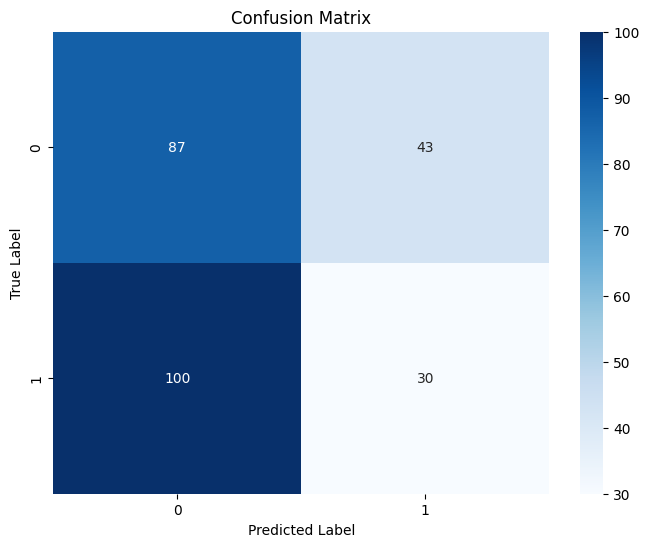

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
print ("Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Lables with the Test Lables:")
#Here we evaluating the performance of the model using the metric method accuracy provided by sklearn.metrics module

#Calculating accuracy:
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Lables with the Test Lables:
Accuracy: 0.5


In [ ]:
pip install wordcloud

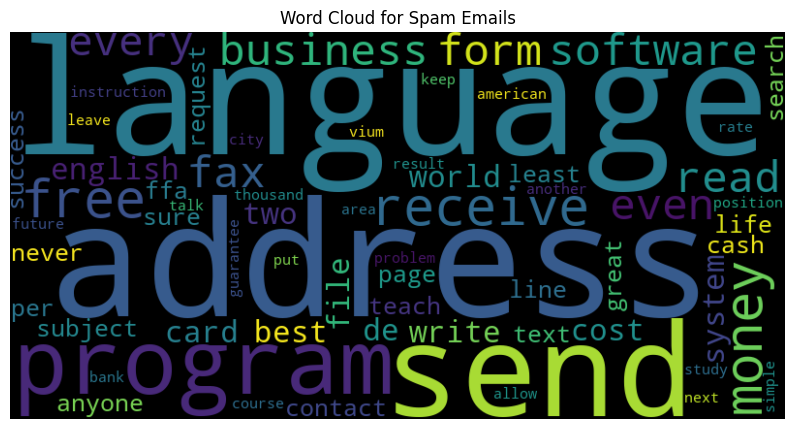

In [ ]:
from wordcloud import WordCloud

# Extract only the words from the dictionary
words = [word for word, _ in dictionary]

# Create word cloud for spam emails
spam_words = ' '.join([word for word, label in zip(words, predictions) if label == 1])
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_words)

# Plot word cloud for spam emails
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()

======================= END OF PROGRAM =========================